# Practice

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
dt=10**(21)
cp=1.05*10**(23)
alpha=0.3
e=0.61
s=1372
sigma=5.67*10**(-8)
t=np.linspace(0,1000*dt,1001)
T=np.zeros(len(t))
T[0]=0
for i in range(0,len(t)-1):
    T[i+1]=T[i]+ dt/cp*(s*(1-alpha))-dt/cp*(4*e*sigma*(T[i])**4)


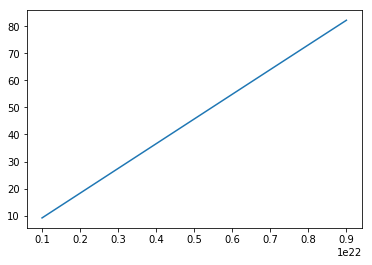

In [53]:
plt.plot(t[1:10],T[1:10])

In [54]:
mean_T=np.mean(T)

In [55]:
T_anom=T-mean_T

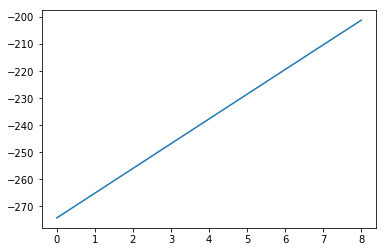

In [58]:
plt.plot(T_anom[1:10])

# Process Model

In [120]:
x=np.zeros(3)
x[0]=0.2
for i in range(0,len(x)-1):
    x[i+1]=4*x[i]*(1-x[i])

In [121]:
print(x)

[0.2    0.64   0.9216]


In [122]:
error=np.random.normal(0,0.001,3)
error2=np.random.normal(0,0.9,3)

In [123]:
y=x+error

In [124]:
y2=x+error2

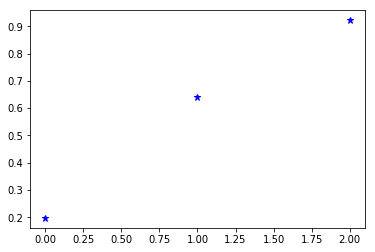

In [125]:
plt.plot(y,"b*",markersize=7)

In [126]:
x2=np.linspace(-0.1,1.1,100)
J=(x2-y[1])**2+(4*x2*(1-x2)-y[2])**2
J1=(x2-y2[1])**2+(4*x2*(1-x2)-y2[2])**2

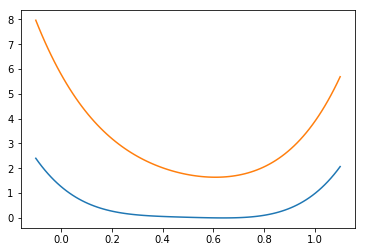

In [127]:
plt.plot(x2,J)
plt.plot(x2,J1)

# BAYESIAN ESTIMATION

In [132]:
sigma_xx=np.matrix([[1,0.61,0.22],[0.61,1,0.37],[0.22,0.37,1]])

In [133]:
sigma_xx

matrix([[1.  , 0.61, 0.22],
        [0.61, 1.  , 0.37],
        [0.22, 0.37, 1.  ]])

In [134]:
x=np.matrix([1,1,1])

In [135]:
x_T=x.transpose()

In [139]:
H=np.matrix([[0,1,0],[0,0,1]]);y=(np.matrix([16,23])).transpose()

In [140]:
sigma_y=0.5*np.eye(2)

In [154]:
H

matrix([[0, 1, 0],
        [0, 0, 1]])

matrix([[ 0.70985756, -0.1750982 ],
        [-0.1750982 ,  0.70985756]])

In [150]:
K=np.matmul(np.matmul(sigma_xx,H.transpose()),np.linalg.inv(sigma_y+H@np.matmul(sigma_xx,H.transpose())))

In [152]:
K

matrix([[0.39449151, 0.04935876],
        [0.64507122, 0.0875491 ],
        [0.0875491 , 0.64507122]])

In [155]:
x=np.matrix([18,18,18])
d=y-np.matmul(H,x.transpose())

In [163]:
estimate=x.transpose()+np.matmul(K,d)

In [164]:
estimate

matrix([[17.4578108 ],
        [17.14760305],
        [21.05025791]])

In [161]:
cov_p=np.matmul((np.eye(3)-K@H),sigma_xx)

In [162]:
cov_p

matrix([[0.74850125, 0.19724575, 0.02467938],
        [0.19724575, 0.32253561, 0.04377455],
        [0.02467938, 0.04377455, 0.32253561]])

# Stochastic

In [10]:
def h_t(t):
    if 1<=t<=10 or 21<=t<=30:
        return 1
    elif 11<=t<=20:
        return 0.1

In [18]:
h_t(22)

1

In [28]:
T=30
t=np.linspace(0,T,T+1)
n=len(t)
x=np.zeros(n)
y=np.zeros(n)
x[0]=np.random.normal(0,1)
error=np.random.normal(0,0.4)
for i in range(1,n):
    x[i]=0.8*x[i-1]+ error
    y[i]=h_t(t[i])*x[i]+np.random.normal(0,0.1)

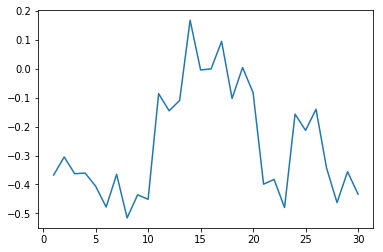

In [29]:
plt.plot(t[1:],y[1:])

# ASSIGNMENT TWO

In [4]:
alpha=0.7
T=100
#t,x,y=Process(alpha,T)

In [7]:
#def Process(alpha,T):
t=np.linspace(0,T,T+1)
n=len(t)
x=np.zeros(n)
x[0]=np.random.normal(0,1)
error1=np.random.normal(0,0.5,n)
error2=np.random.normal(0,0.1,n-1)
for i in range(1,n-1):
    x[i]=alpha*x[i-1] + error1[i]
y=x[1:]+error2
   # return t,x,y

In [8]:
len(y)

100

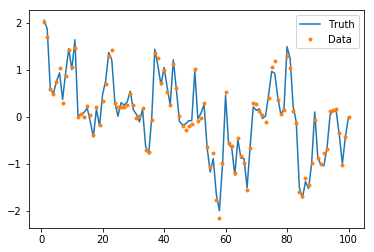

In [9]:
plt.plot(t[1:],x[1:])
plt.plot(t[1:],y,".")
plt.legend(["Truth","Data"])

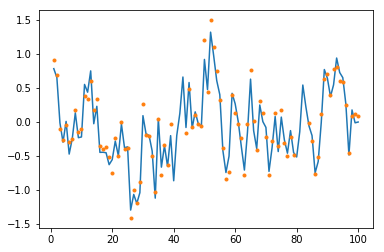

In [202]:
plt.plot(t[1:],x[1:])
plt.plot(t2,y,".")

NameError: name 'data2' is not defined

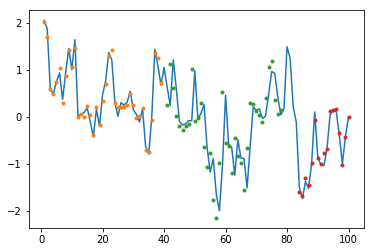

In [27]:
T=100
T1=40
T2=43
T3=80
T4=83
state,=plt.plot(t[1:],x[1:])
data1,=plt.plot(np.arange(1,T1),y[0:T1-1],".")
data1,=plt.plot(np.arange(T1+1,T3-1),y[T1+1:T3-1],".")
data1,=plt.plot(np.arange(T4+1,T+1),y[T4:T],".")
plt.legend([state,data1,data2,data3], ['true state x_t','data y_t'])

In [13]:
np.arange(1,T1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [276]:
sigma=0.1
mean=0
r2=0.1
q2=0.5
alpha=0.7
T=92
sigma_new, mean_new,gain=Karman(mean,alpha,sigma,r2,q2,y,T)

In [ ]:
def kalman(sig,mu,r2,q2,alpha,y,T,T1,T2,T3,T4):
    forcast=np.zeros(T+1)
    forcast_u=np.zeros(T+1)
    gain=np.zeros(T+1)
    mu_new=np.zeros(T+1)
    sig_new=np.zeros(T+1)
    mu_old=alpha*mu
    sig_old=q2+alpha*sig*alpha
    for i in range(1,T+1):
        forcast[i]=mu_old
        forcast_u[i]=sig_old
        h=1
        if np.logical_or(np.logical_and(T1 <= i, i <= T2),np.logical_and(T3 <= i, i <= T4)):
            h=0
            y[i]=0 #This makes mu_new[i]=mu_old
        gain[i]=sig_old*h*(h*sig_old*h+r2)**(-1)
        mu_new[i]=mu_old+gain[i]*(y[i]-h*mu_old) # filtering estimate
        sig_new[i]=(1-gain[i]*h)*sig_old  #filtering uncertainty
        mu_old=alpha*mu_new[i]
        sig_old=q2+alpha**2*sig_new[i]
    return mu_new, sig_new, gain, forcast, forcast_u